In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Ensure confusion_matrix is imported
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string


nltk.download('stopwords')
nltk.download('wordnet')


sns.set(style="whitegrid")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:

df = pd.read_csv('Email_Classification.csv')

print("Initial Dataset:")
print(df.head())


print("\nDataset Information:") # will provide info for the data set
print(df.info())




Initial Dataset:
                                              Emails  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...    0.0
1  martin a posted tassos papadopoulos the greek ...    0.0
2  man threatens explosion in moscow thursday aug...    0.0
3  klez the virus that won t die already the most...    0.0
4   in adding cream to spaghetti carbonara which ...    0.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Emails  3015 non-null   object 
 1   label   3000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.8+ KB
None


In [6]:

df = df.dropna(subset=['Emails', 'label'])# dropping rows where misssing values are present

print("\nNumber of rows after dropping missing values:")
print(df.shape[0])



Number of rows after dropping missing values:
2999



Dataset After Preprocessing:
                                              Emails  \
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...   
1  martin a posted tassos papadopoulos the greek ...   
2  man threatens explosion in moscow thursday aug...   
3  klez the virus that won t die already the most...   
4   in adding cream to spaghetti carbonara which ...   

                                    Processed_Emails  
0  date wed number aug number number number numbe...  
1  martin posted tasso papadopoulos greek sculpto...  
2  man threatens explosion moscow thursday august...  
3  klez virus die already prolific virus ever kle...  
4  adding cream spaghetti carbonara effect pasta ...  


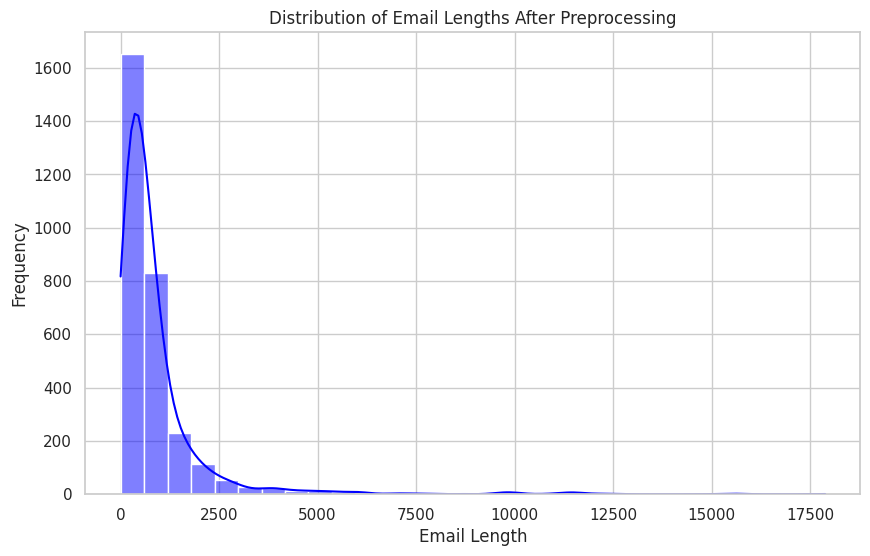

In [7]:
############# text pre processing
def preprocess_text(text):
    if pd.isna(text):  # Checking for missing values if any
        return ''
    if not isinstance(text, str):  # Checking non string
        return ''
    text = text.lower()  # Convert to lowercase (so that the whole text is under one precise stype)
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())  # Lemmatization process
    return text


df['Processed_Emails'] = df['Emails'].apply(preprocess_text) #applying the preprocessing function to


print("\nDataset After Preprocessing:")
print(df[['Emails', 'Processed_Emails']].head())


df['Email_Length'] = df['Processed_Emails'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Email_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Email Lengths After Preprocessing')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()


In [8]:

X = df['Processed_Emails']
y = df['label']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

print("\nShape of Vectorized Data:")
print(X_vectorized.shape)



Shape of Vectorized Data:
(2999, 25958)


In [9]:
############################ Spliting the data into training and testing sets############################
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


print("\nChecking for NaN values in y_train and y_test:")# Check for NaN values in y_train and y_test
print(f"NaN values in y_train: {y_train.isna().sum()}")
print(f"NaN values in y_test: {y_test.isna().sum()}")


print("\nShape of Training Data:")
print(X_train.shape)
print("\nShape of Testing Data:")
print(X_test.shape)




Checking for NaN values in y_train and y_test:
NaN values in y_train: 0
NaN values in y_test: 0

Shape of Training Data:
(2099, 25958)

Shape of Testing Data:
(900, 25958)


In [10]:

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("\nModel Training Complete.")



Model Training Complete.



Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       741
         1.0       0.86      0.88      0.87       159

    accuracy                           0.95       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.95      0.95      0.95       900


Accuracy Score: 0.9533333333333334


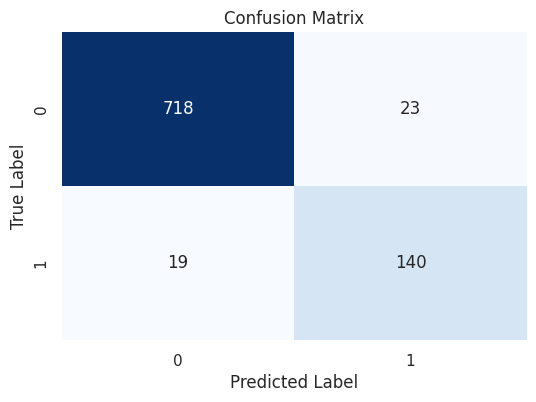

In [45]:
################################ Making predictions
y_pred = clf.predict(X_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

############################### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
